# Comparing Quantum to Classical Support Vector Machines
13.01.2020

As the world grows in its use of technology, machine learning algorithms are being used with increasing frequency to understand the patterns in the data that we produce. As humanity begins to create more data than ever before, we need more efficient ways to sort through this data to find the underlying patterns. A Support Vector Machine is a type of machine learning algorithm that is able to classify datasets. It has recently been proven successful, working on both a quantum computer and a classical computer, using slightly different methods. This report aims to look deeper into each of these methods of classifying a health dataset and determining the benefits of each classification method.

### Objective

This scientific experiment will aim to explain the basics behind both a Classical and Quantum Support Vector Machine that is able to classify between two distinct classes. It will then further elaborate onwards, comparing the Classical Support Vector Machine (SVM) to the Quantum Support Vector Machine (QSVM) in the aim to find which is computationally superior.

In this report, I will focus on support vector machines, which are designed for classification problems on small datasets and which have a quantum QSVM counterpart.

> Many sections have been omitted for sake of brevity. Read the full report for more

In [1]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from qiskit.aqua.utils import split_dataset_to_data_and_labels

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.004, plot_data=True):

    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #plt.xlim(xx1.min(), xx1.max())
    #plt.ylim(xx2.min(), xx2.max())
    if plot_data:
        # plot all samples
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)


/Users/james/Projects/Envs/quantum/lib/python3.8/site-packages/sympy/printing/ccode.py:8: SymPyDeprecationWarning: 

importing from sympy.printing.ccode has been deprecated since SymPy
1.7. Use Import from sympy.printing.c instead. See
https://github.com/sympy/sympy/issues/20256 for more info.

  SymPyDeprecationWarning(
/Users/james/Projects/Envs/quantum/lib/python3.8/site-packages/qiskit/__init__.py:54: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  warnings.warn('Could not import the Aer provider from the qiskit-aer '
/Users/james/Projects/Envs/quantum/lib/python3.8/site-packages/qiskit/providers/ibmq/api_v2/clients/websocket.py:85: DeprecationWarning: "@coroutine" decorator is deprecated since Python 3.8, use "async def" instead
  def _connect(self, url):
/Users/james/Projects/Envs/quantum/lib/python3.8/site-packages/qiskit/providers/ibmq/api_v2/clients/websocket.py:133: DeprecationWarning: "@coroutine

### Breast Cancer Dataset
To train and test the SVM and QSVM, a labelled real life dataset was used of Dr William H Wolberg’s breast cancer data set [1]. Breast cancer is one of the most common cancers worldwide and is the majority of new cancers diagnosed. Correct early diagnosis dramatically improves a patient’s chance of survival, thus machine learning algorithms are used so that diagnosis can be as automated and accurate as possible thus allowing many patients to be diagnosed properly.

This non-linear dataset contains 569 training examples. Each example has 32 different features about the cell nuclei such as the radius, texture, area, perimeter, as well as the class of the cancer being either malignant or benign. Using a principle component analysis, the 32 dimensions can be reduced down to 2 dimensions allowing this dataset to be more easily used. The SVM and QSVM will aim to predict which type of cancer it is from these two attributes. These two principal component dimensions are graphed below.

/Users/james/Projects/Envs/quantum/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


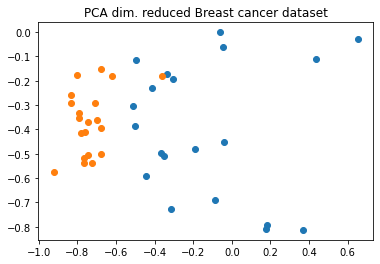

In [2]:
from datasets import Breast_cancer
sample_Total, training_input, test_input, class_labels = Breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    PLOT_DATA=True
)

train = split_dataset_to_data_and_labels(training_input)
test = split_dataset_to_data_and_labels(test_input)

X = train[0][0]
y = train[0][1]

t_X = test[0][0]
t_y = test[0][1]

## Classical Support Vector Machine

Support vector machines aim to find the optimal hyperplane to segregate the data into its different classes. This is best visualised by seeing the algorithm draw a line or curve (or a manifold in higher dimensions) that optimally separates the two classes, and understanding that the algorithm is trying to find the most optimal hyperplane.
A hyperplane in n dimensions is n-1 dimensional “flat” subspace inside the larger n dimension. As such in two dimensions it is a line, in three dimensions it is a two dimensional plane, and in four dimensions it is a three dimensional cube (we are unable to visualise this).

> This is computed below, but read the report for a futher analysis to how this process works

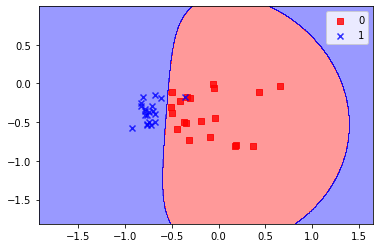

In [3]:
svm = SVC(kernel='rbf', random_state=0, gamma=1.0, C=10.0)  # Radical basis function kernal

svm.fit(X, y)
plot_decision_regions(X, y, svm)
plt.legend()
plt.show()

Predicted: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1] 
Which was  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Overall accuracy of: 0.9
Overall accuracy (with train points) of: 0.975


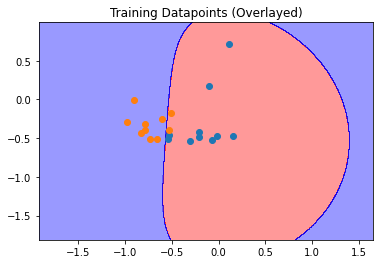

In [4]:
# Test accuracy of the generated support vector machine
result = svm.predict(t_X)
print('Predicted:', result, '\nWhich was ', t_y)
print('Overall accuracy of:', svm.score(t_X, t_y))
print('Overall accuracy (with train points) of:', svm.score(X, y))


# Plot that data!
plt.title('Training Datapoints (Overlayed)')
plot_decision_regions(X, y, svm, plot_data=False)
plt.scatter(t_X[t_y==0][:, 0], t_X[t_y==0][:, 1])
plt.scatter(t_X[t_y==1][:, 0], t_X[t_y==1][:, 1])
plt.show()


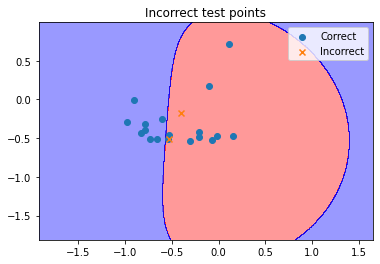

In [5]:
wrong = t_y - result
plt.title('Incorrect test points')
plot_decision_regions(X, y, svm, plot_data=False)
plt.scatter(t_X[wrong==0][:, 0], t_X[wrong==0][:, 1], marker='o', label='Correct')
plt.scatter(t_X[wrong>0][0], t_X[wrong>0][1], marker='x', label='Incorrect')
plt.legend()
plt.show()

## Quantum Support Vector Machines

The quantum method uses the same classical SVM to linearly separate the data, however, instead of using classical methods to solve the kernel trick, it uses entangled qubits and interference to solve this problem, on quantum hardware, thus generating the kernel through a quantum technique. This is possible because quantum states are defined by inner products, and so calculating them can be done through a physical quantum system, as opposed to a digital calculation.

> Again, this is much more futher explained in the report

In [6]:
from qiskit import BasicAer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
#from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import QuantumInstance  #
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
import qiskit.tools.jupyter  

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging

backend = BasicAer.get_backend('qasm_simulator')

seed = 10598

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, skip_qobj_validation=False)

In [7]:
result = qsvm.run(quantum_instance)

print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  0.8


kernel matrix during the training:


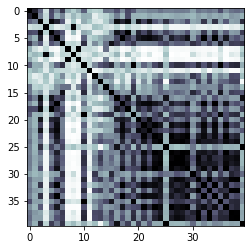

Predicted: [0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1] 
Which was  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Overall accuracy of: 0.8
Overall accuracy (with train points) of: 0.875


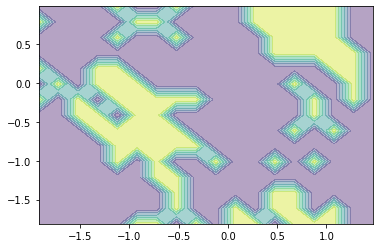

In [8]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

results = qsvm.predict(t_X, quantum_instance)
result_train = qsvm.predict(X, quantum_instance)

accuracy = 1-((results + t_y) == 1).sum()/len(t_y)

print('Predicted:', results, '\nWhich was ', t_y)
print('Overall accuracy of:', accuracy)
print('Overall accuracy (with train points) of:', 1-((result_train + y) == 1).sum()/len(y))

resolution = 0.2

# plot the decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
Z = qsvm.predict(np.array([xx1.ravel(), xx2.ravel()]).T, quantum_instance)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.show()

## Conclusion

In terms of accuracy, the Classical system is superior to the Quantum SVM, as the classical SVM achieved an accuracy of 90% whereas the quantum system only had an accuracy of 80%. 

However both are still supeior to random guesswork of 50%

> Futher analysis is in the report